<p style="text-align: center;" ><font size="+3"><u><b>Laboratory 3 Part 2: Linear Systems Theory Applied to Optical Imaging Systems</u></b></p>

<p style="text-align: left;" ><font size="+1"><b>Measure the Point Spread Function of a Microscope</b></p>

<div class="alert alert-block alert-warning">
<font color='black'>

The microscope has been set up using 8” of optical tube (plus the filter wheel and aperture). We have placed two targets on the stage - the resolution target and a pinhole target. In addition, the glass diffuser have been removed from setup. Instead, as shown in the photo below, a piece of plastic has been placed underneath the resolution target to function as a diffuser. 

IMPORTANT: if you have a red camera, please add a 0.5" tube to your system
     </font> 
</div>

<img src="Lab3\stage.png" style="width:500px">

In [1]:
# add BaITools to path
import os
import numpy as np
import sys
from IPython.display import Image
sys.path.insert(0,r'BaITools')
sys.path.insert(0,r'dlls')

dll_path = r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab3\dlls"
os.environ["PATH"] = dll_path + os.pathsep + os.environ["PATH"]

# for basic functions
import numpy as np
from time import sleep
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
from IPython.display import display, clear_output
import cv2
plt.rcParams['font.size'] = 16   # set the font size globally

from zelux import ZeluxCamera as Camera  # for camera

In [55]:
print('Camera initialized as c')
c = Camera()
c.open()

# check image properties
c.get_properties()
c.set_exposure(100) 
c.get_exposure()
c.set_framerate(1)
c.get_framerate()


# try continuous capture
# to quit press live feed press "q"q
while True:
    # Convert the image from 10-bit to 8-bit and then display the image. 
     cv2.imshow('Camera', cv2.normalize(c.capture().copy(), None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U))
     if cv2.waitKey(30) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

Camera initialized as c


Could not disarm camera; tl_camera_disarm() returned non-zero error code: 1003; error message: Camera handle is not valid. Check that the camera handle is not null and that the camera has not been closed. Error: Invalid parameter. Check documentation for detailed parameter information.
Exception ignored in: <function ZeluxCamera.__del__ at 0x000001DCDAF24550>
Traceback (most recent call last):
  File "c:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab3\BaITools\zelux.py", line 39, in __del__
    self._cam.disarm()
  File "c:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab3\thorlabs_tsi_sdk\tl_camera.py", line 855, in disarm
    raise exception
  File "c:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab3\thorlabs_tsi_sdk\tl_camera.py", line 852, in disarm
    raise TLCameraError(_create_c_failure_message(self._sdk, "tl_camera_disarm", error_code))
thorlabs_tsi_sdk.tl_camera.TLCameraError: tl_camera_

Camera Model 	 Thorlabs CS165MU
Pixel Size 	 3.45  microns
Image size 	 [1440, 1080]
Exposure 	 99.83  ms
Exposure Range 	 [0.91, 26842.68]  ms
Framerate 	 1.0
Frame Range 	 [0.9, 34.8]


In [54]:
c.close()

<div class="alert alert-block alert-success">
<font color='black'>
1. Move the stage to find the resolution target. As you have done previously, compute the pixel size, magnification, and sampling frequency and report below:
         </font> 
</div>

In [4]:
# Image(filename='Grid.png', width=300, height=300)

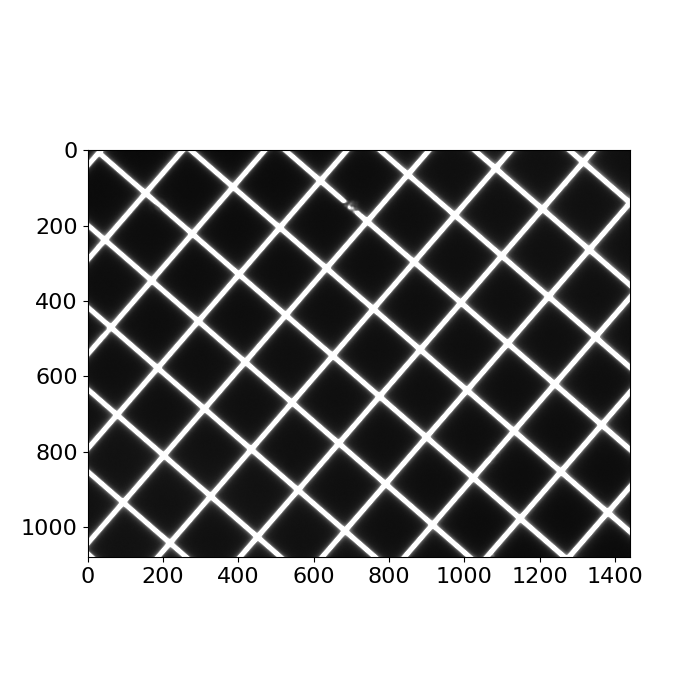

In [ ]:
%matplotlib widget
plt.rcParams['font.size'] = '16'   # set the font size globally

distance = np.load(r"Grid.npy")

fig, ax = plt.subplots(figsize=(7, 7))
x = ax.imshow(distance, cmap='gray', clim=[0, 255])  
pass

In [2]:
x1 = np.array([201, 807])
x2 = np.array([328, 879])

dist = np.linalg.norm(x1-x2)
print(dist)

145.98972566588375


NOTE: We are using the Thorlabs CS165MU camera model, not the DCC3240M; therefore, our camera’s pixel size is 3.45 microns.\
Pixel size = 3.45 𝜇m\
Total tube length = 8.5 inches\
Average Square Length:  145 pixels\
Size of one pixel = 100𝜇m / 145 pixels = 0.690 x 0.690 𝜇m per pixel\
\
Magnification = 3.45 / 0.690 = 5.0\
sampling freq = 1/5.0 𝜇m = 0.20 𝜇m 

<div class="alert alert-block alert-warning">
<font color='black'>

Now find the pinhole. The pinhole lets through very little light and can be difficult to find. Thus, you will go through a very specific process to be able to find the pinhole and collect good data. <br/> <br/>

First, set your system to the “no filter” setting. Turn up the LED illuminator to the maximum setting. Also, the illuminator will get warm while in use. **Remember to turn off the illuminator after each data collection.<br/><br/>

Set the camera exposure to something long like 1000 ms. (To do this you will likely need to reduce the framerate below 1 frame/second by setting `c.set_framerate()`). You may need to tweak this exposure setting to get good (unsaturated) data. Set up your system in a continuous display loop as you have in previous labs and start searching for the pinhole. Having your axes aligned and moving slowly will be critical to find the pinhole. Similarly, you will need to be somewhat close to focus in order to see the pinhole. In this lab, it may be helpful to use `cmap='jet'` to visualize your data.<br/><br/>
    
Once you have found the pinhole, change your live image to display only a 200 x 200 pixel region around the pinhole. **Change the filter to filter 2 (“green” 540 nm).** Attempt to get the image focused as best as you can. If the image is saturated, adjust the exposure accordingly. <br/><br/>
    
You may notice that the background isn’t entirely dark. Recall from Lab 1 that even when no light hits the detector you can read non-zero values. We will need to correct for this. Without changing any part of the setup, turn off the illuminator (e.g. set intensity to zero) and collect 50 dark frames to subtract from your data. (We will not be conducting an air scan to normalize the data.) Turn the illuminator back on when finished.

</font> 
</div>

In [ ]:
# import glob
# folder = r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab3\Output"

# dark_files = glob.glob(f"{folder}\\dark_*.npy")
# D = np.mean([np.load(file) for file in dark_files], axis=0)

<div class="alert alert-block alert-success">
<font color='black'>

2. Center your pinhole as best as you can within a 200 x 200 zoomed image at the best focus you can achieve. (Hint, the best focus will have the highest value at the center of the pinhole.) Average 100 images to obtain an image of your pinhole. <br/><br/>  
    
Paste that image below. Additionally, re-window (using `clim`) your data to show as many sidelobes as you can in your data, and show that image as well.  Also, save your data (e.g. `np.save('wide_aperture.npy', mean_image)`).
</font> 
</div>

In [39]:
c.close()

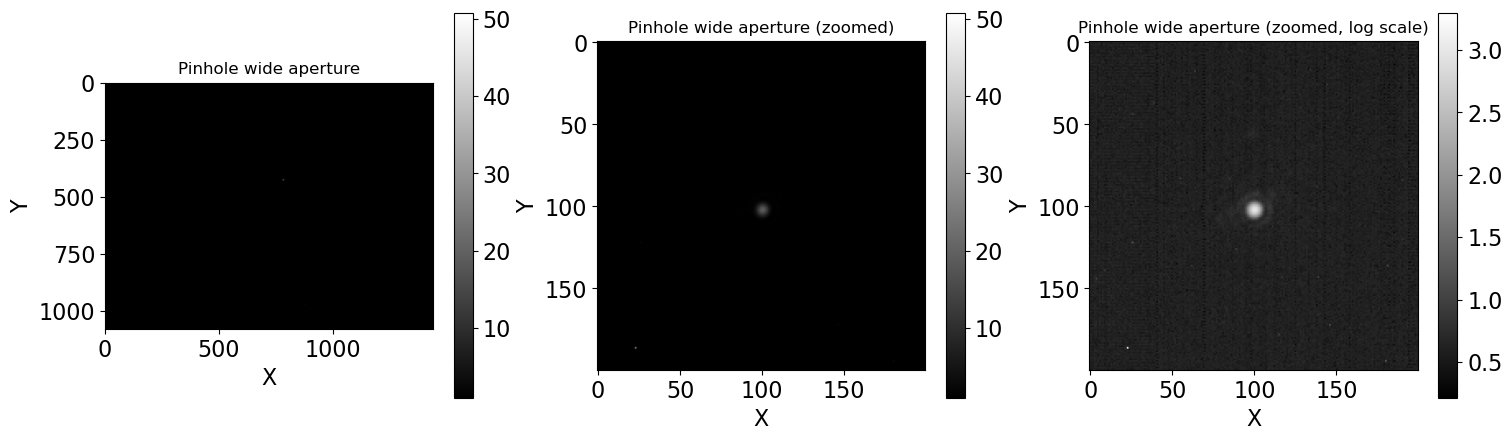

In [58]:
import glob
folder = r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab3\Output"

pinhole_files = glob.glob(f"{folder}\\pinhole_wide_aperature_*.npy")
wide = np.mean([np.load(file) for file in pinhole_files], axis=0)

dark_files = glob.glob(f"{folder}\\dark_*.npy")
D = np.mean([np.load(file) for file in dark_files], axis=0)

wide = wide - D

zoomed_wide = wide[325:525, 680:880]
vmin = np.percentile(wide, 90)
vmax = np.max(wide)


np.save('wide_aperture_avg.npy', zoomed_wide)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

x = ax1.imshow(wide, cmap='gray', vmin=vmin, vmax=vmax)
fig.colorbar(x, ax=ax1)
ax1.set_title("Pinhole wide aperture", fontsize = 12)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

y = ax2.imshow(zoomed_wide, cmap='gray', vmin=vmin, vmax=vmax)
fig.colorbar(y, ax=ax2)
ax2.set_title("Pinhole wide aperture (zoomed)", fontsize = 12)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")

log_wide= np.log(zoomed_wide + 1)

z = ax3.imshow(log_wide, cmap='gray')
fig.colorbar(z, ax=ax3)
ax3.set_title("Pinhole wide aperture (zoomed, log scale)", fontsize = 12)
ax3.set_xlabel("X")
ax3.set_ylabel("Y")

plt.show()


<div class="alert alert-block alert-success">
<font color='black'>

3. Repeat the above experiment with two additional aperture settings (medium and small). (Note that you should not have to change focus, but changing the exposure time will require new dark frame data.) Save `medium_aperture.npy` and `small_aperture.npy` as well. 
</font> 
</div>

<img src="Lab3\aperture.png" style="width:800px">
Example aperture position: wide open (100% open), medium aperture (60% open), small aperture (30% open)

<div class="alert alert-block alert-success">
<font color='black'>

4. Show the averaged, 200 x 200 images (both normal and “zoomed” `clim`) below. Discuss the effect of aperture on the appearance of the pinhole.
</font> 
</div>

[[0.79 0.42 0.66 ... 0.5  0.41 0.54]
 [0.51 0.74 0.58 ... 0.65 0.53 0.54]
 [0.62 0.64 0.79 ... 0.36 0.29 0.38]
 ...
 [0.48 0.33 0.76 ... 0.52 0.33 0.53]
 [0.54 0.75 0.67 ... 0.77 0.88 0.71]
 [0.48 0.68 0.57 ... 0.35 0.53 0.5 ]]


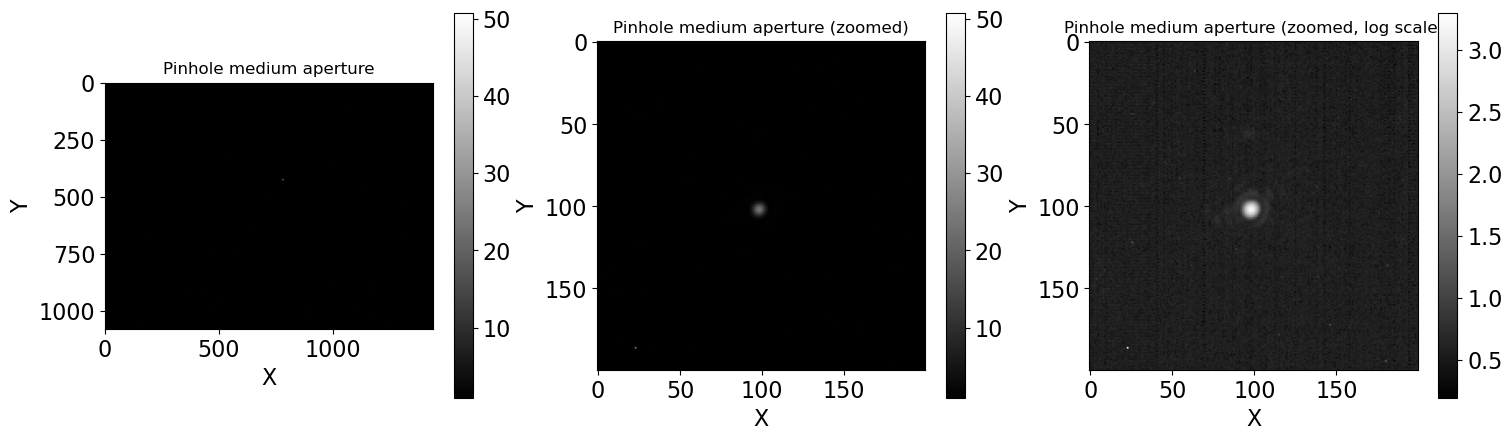

In [59]:
import glob
folder = r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab3\Output"

pinhole_files = glob.glob(f"{folder}\\pinhole_medium_aperature_*.npy")
medium = np.mean([np.load(file) for file in pinhole_files], axis=0)

dark_files = glob.glob(f"{folder}\\dark_medium_aperature_*.npy")
D = np.mean([np.load(file) for file in dark_files], axis=0)

medium = medium - D
medium = np.maximum(medium, 0)

print(medium)

zoomed_medium = medium[325:525, 680:880]
vmin = np.percentile(medium, 90)
vmax = np.max(medium)

np.save('medium_aperture_avg.npy', zoomed_medium)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

x = ax1.imshow(medium, cmap='gray', vmin=vmin, vmax=vmax)
fig.colorbar(x, ax=ax1)
ax1.set_title("Pinhole medium aperture", fontsize = 12)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

y = ax2.imshow(zoomed_medium, cmap='gray', vmin=vmin, vmax=vmax)
fig.colorbar(y, ax=ax2)
ax2.set_title("Pinhole medium aperture (zoomed)", fontsize = 12)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")

log_medium = np.log(zoomed_medium + 1)

z = ax3.imshow(log_medium, cmap='gray')
fig.colorbar(z, ax=ax3)
ax3.set_title("Pinhole medium aperture (zoomed, log scale)", fontsize = 12)
ax3.set_xlabel("X")
ax3.set_ylabel("Y")

plt.show()

3.3120018028576848


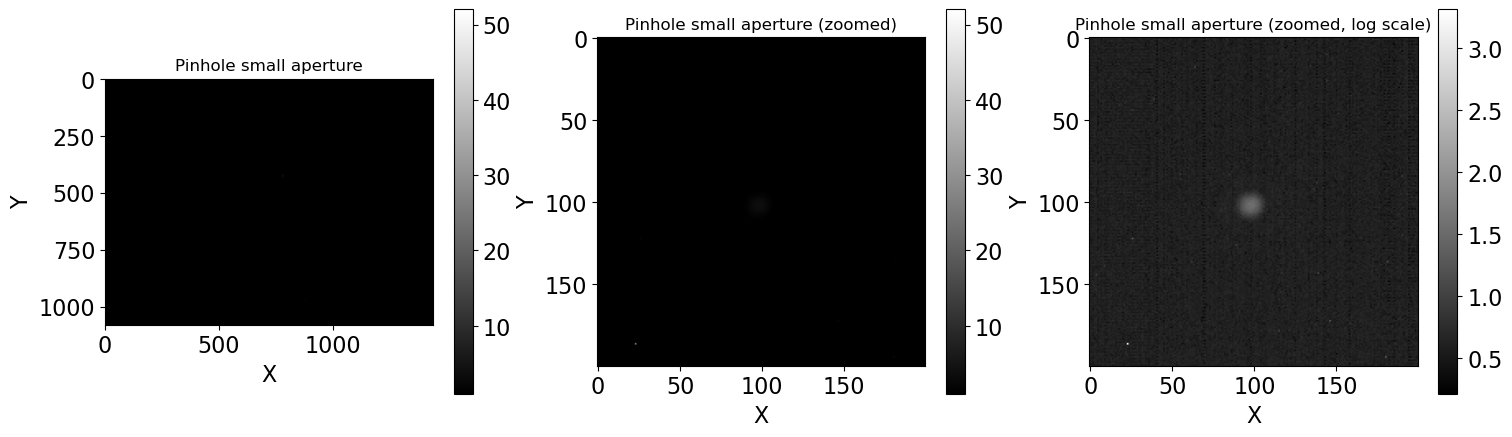

In [60]:
import glob
folder = r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab3\Output"

pinhole_files = glob.glob(f"{folder}\\pinhole_small_aperature_*.npy")
small = np.mean([np.load(file) for file in pinhole_files], axis=0)

dark_files = glob.glob(f"{folder}\\dark_small_aperature_*.npy")
D = np.mean([np.load(file) for file in dark_files], axis=0)

small = small - D

small_zoom = small[325:525, 680:880]
vmin = np.percentile(small, 90)
vmax = np.max(small)

np.save('smallaperture_avg.npy', small_zoom)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

x = ax1.imshow(small, cmap='gray', vmin=vmin, vmax=vmax)
fig.colorbar(x, ax=ax1)
ax1.set_title("Pinhole small aperture", fontsize=12)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

y = ax2.imshow(small_zoom, cmap='gray', vmin=vmin, vmax=vmax)
fig.colorbar(y, ax=ax2)
ax2.set_title("Pinhole small aperture (zoomed)", fontsize=12)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")

log_small = np.log(small_zoom + 1)
print(np.max(log_small))

z = ax3.imshow(log_small, cmap='gray')
fig.colorbar(z, ax=ax3)
ax3.set_title("Pinhole small aperture (zoomed, log scale)", fontsize =12)
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
plt.show()

As the aperature gets smaller, the pinhole becomes more diffuse and larger because the image is no longer in focus. With a larger aperature, more light is collected, causing the pinhole to have a higher intensity. Additionally, the larger aperature allows more spatial frequencies to enter the lens which yields a better resolution (less blur) and smaller PSF. The smaller aperature has lower resolution because captures fewer spatial frequencies (more blur) and larger PSF. \
\
Additionally we were able to see more sidelobes that were further apart in the wide aperature due to a stronger diffraction of the larger range of spatial frequencies captured. Meanwhile the converse is true when the aperature is smaller, there is less diffraction and the sidelobes are much weaker and barely visible.


<!-- 
larger aperature captures more spatial frequencies -> less blur
Smaller aperature has lower resolution because captures lesss spatial frequencies
Smaller aperaturre lets less light in -->

<div class="alert alert-block alert-success">
<font color='black'>

5. For your 3 data sets above (you saved data for wide, medium, and small apertures), estimate the diameter of the first dark ring around your pinhole images. Report each below with units:
</font> 
</div>

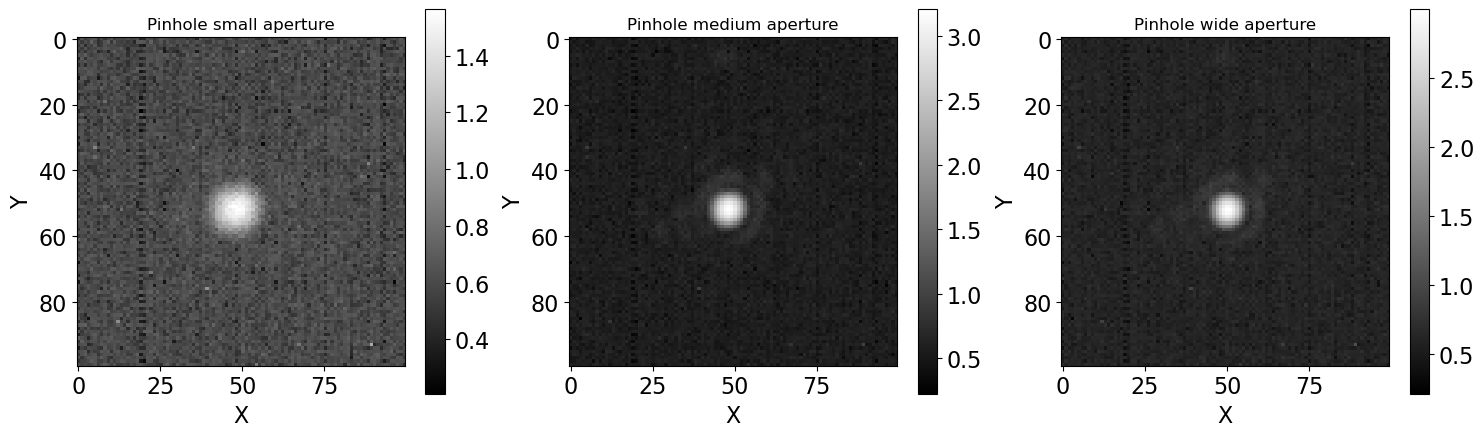

In [ ]:
small_zoom = np.log(np.load('smallaperture_avg.npy')+1)
medium_zoom = np.log(np.load('medium_aperture_avg.npy')+1)
wide_zoom = np.log(np.load('wide_aperture_avg.npy')+1)

small_superzoom = small_zoom[50:150, 50:150]
medium_superzoom = medium_zoom[50:150, 50:150]
wide_superzoom = wide_zoom[50:150, 50:150]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

x = ax1.imshow(small_superzoom, cmap='gray')
fig.colorbar(x, ax=ax1)
ax1.set_title("Pinhole small aperture", fontsize=12)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

y = ax2.imshow(medium_superzoom, cmap='gray')
fig.colorbar(y, ax=ax2)
ax2.set_title("Pinhole medium aperture", fontsize=12)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")

z = ax3.imshow(wide_superzoom, cmap='gray')
fig.colorbar(z, ax=ax3)
ax3.set_title("Pinhole wide aperture", fontsize =12)
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
plt.show()


Small aperature pinhole dark ring= 8 pixels = 5.52 um \
Medium aperature pinhole dark ring = 14 pixels = 9.66 um \
Wide aperature pinhole dark ring = 15 pixels = 10.35 um

<div class="alert alert-block alert-success">
<font color='black'>

6. For your 3 data sets above, show the absolute value of the Fourier transform of your data using `ax.plot_surface()`. What are you looking at? Describe what you see and estimate the “diameter” of the function you observe. (Note: If you have a “spike” at your DC value, talk to the instructors for a remedy.) </font> 
</div>

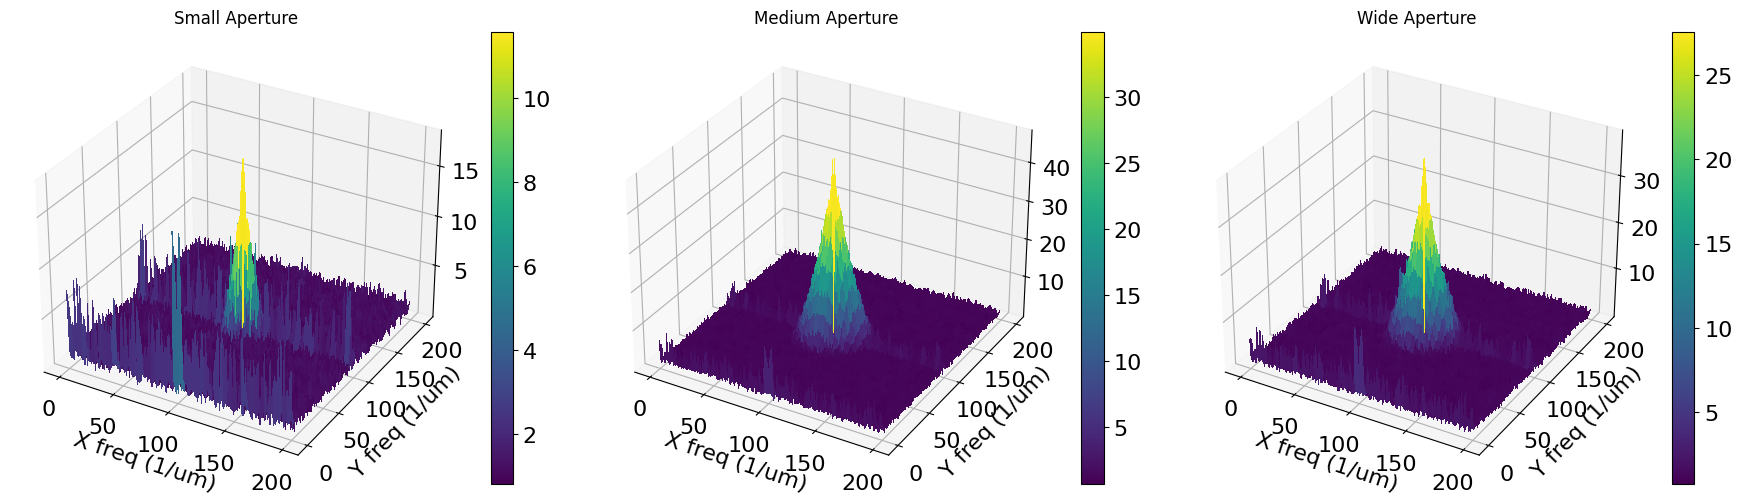

In [3]:
from numpy.fft import fft2, fftshift, ifftshift
from mpl_toolkits.mplot3d import Axes3D

small_zoom = np.load('smallaperture_avg.npy')
medium_zoom = np.load('medium_aperture_avg.npy')
wide_zoom = np.load('wide_aperture_avg.npy')

small_zoom = small_zoom/np.max(small_zoom)
medium_zoom = medium_zoom/np.max(medium_zoom)
wide_zoom = wide_zoom/np.max(wide_zoom)

fftshifted_small = fftshift(fft2(ifftshift(small_zoom)))
fftshifted_medium = fftshift(fft2(ifftshift(medium_zoom)))
fftshifted_wide = fftshift(fft2(ifftshift(wide_zoom)))

fftshifted_small = np.abs(fftshifted_small)
fftshifted_medium = np.abs(fftshifted_medium)
fftshifted_wide = np.abs(fftshifted_wide)

fftshifted_small[fftshifted_small == np.max(fftshifted_small)] = np.average(fftshifted_small.flatten())
fftshifted_medium[fftshifted_medium == np.max(fftshifted_medium)] = np.average(fftshifted_medium.flatten())
fftshifted_wide[fftshifted_wide == np.max(fftshifted_wide)] = np.average(fftshifted_wide.flatten())

fig = plt.figure(figsize=(18, 5))

for i, fft_data in enumerate([fftshifted_small, fftshifted_medium, fftshifted_wide]):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    X = np.arange(fft_data.shape[1])
    Y = np.arange(fft_data.shape[0])
    X, Y = np.meshgrid(X, Y)
    
    surf = ax.plot_surface(X, Y, fft_data, cmap='viridis', linewidth=0, antialiased=False)
    fig.colorbar(surf, ax=ax)
    
    ax.set_title(["Small", "Medium", "Wide"][i] + " Aperture", fontsize=12)
    ax.set_xlabel("X freq (1/um)")
    ax.set_ylabel("Y freq (1/um)")

plt.tight_layout()
plt.show()

The surface plot of the fourier transform of the various PSF images approximated by the pinhole shows the OTF images. We observe that a smaller aperature yields a thinner OTF, while the wider aperature yields a wider gaussian OTF. This makes sense because of the skinny-fat relation where we observed the most in-focus image of concentrated signal in the wider aperature in the spatial domain, making a wider spread out OTF gaussian in the frequency domain after taking the fourier transform. Similarly, the converse is true where the small aperature yielded a wider diffused pinhole image, yielding a thinner gaussian in the OTF image. \
\
We estimate the diameter of the OTF is 40 1/um in small aperature, 65 1/um for the medium aperature, and 80 1/um for the wide aperature.

<div class="alert alert-block alert-success">
<font color='black'>

7. Return to the wide open aperture scenario with a centered pinhole, 200 x 200 image and **switch to filter 1 ("blue" 460 nm)**. Choose an appropriate exposure and dark-correct your data. Show a best-focus image, windowed image to see sidelobes, and the magnitude of the Fourier transform of this image. Save your image data. Additionally, estimate the diameter of the first dark ring in the image and the diameter of the Fourier-domain function. Show all of this below and discuss the relation to the in-focus filter 2 case.  </font> 
</div>

[ 0.3732304   0.3732304   0.38666108 ... 10.02235076 10.03986291
 10.03986291]


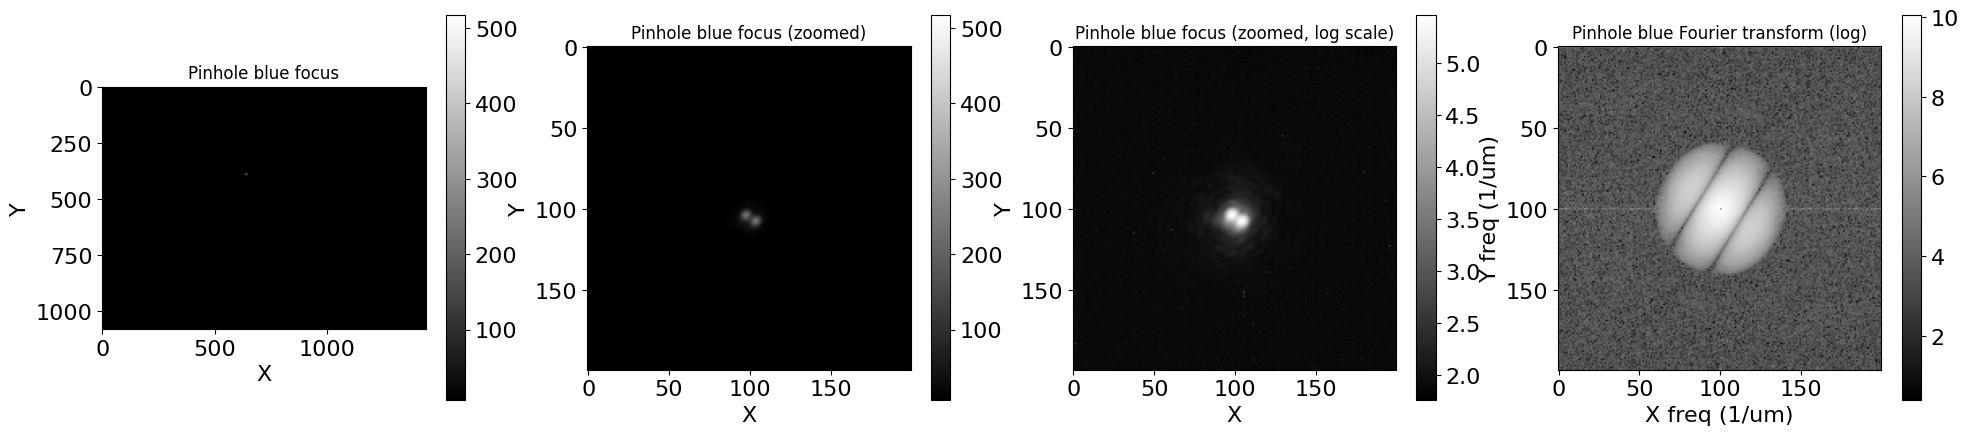

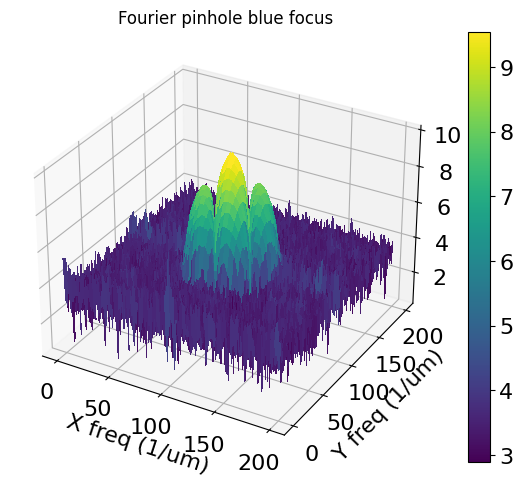

In [25]:
import glob
folder = r"C:\Users\willllllli\Documents\BME Year 3\Build_imager\Build_Imager_2025\Lab3\Output"

pinhole_files = glob.glob(f"{folder}\\blue_focus_*.npy")
blue_focus = np.mean([np.load(file) for file in pinhole_files], axis=0)

dark_files = glob.glob(f"{folder}\\dark_*.npy")
D = np.mean([np.load(file) for file in dark_files], axis=0)

blue_focus = blue_focus - D
blue_focus = np.maximum(blue_focus, 0)

blue_focus_zoom = blue_focus[285:485, 540:740]
vmin = np.percentile(blue_focus, 90)
vmax = np.max(blue_focus)

np.save('blue_focus.npy', blue_focus_zoom)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 5))

x = ax1.imshow(blue_focus, cmap='gray', vmin=vmin, vmax=vmax)
fig.colorbar(x, ax=ax1)
ax1.set_title("Pinhole blue focus", fontsize = 12)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

y = ax2.imshow(blue_focus_zoom, cmap='gray', vmin=vmin, vmax=vmax)
fig.colorbar(y, ax=ax2)
ax2.set_title("Pinhole blue focus (zoomed)", fontsize = 12)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")

log_medium = np.log(blue_focus_zoom + 1)

z = ax3.imshow(log_medium, cmap='gray')
fig.colorbar(z, ax=ax3)
ax3.set_title("Pinhole blue focus (zoomed, log scale)", fontsize = 12)
ax3.set_xlabel("X")
ax3.set_ylabel("Y")

fft_blue_focus = fftshift(fft2(ifftshift(blue_focus_zoom)))
fft_blue_focus = np.abs(fft_blue_focus)
fft_blue_focus[fft_blue_focus == np.max(fft_blue_focus)] = np.average(fft_blue_focus.flatten())
fft_blue_focus = np.log(fft_blue_focus + 1)
print(np.sort(fft_blue_focus.flatten()))

w = ax4.imshow(fft_blue_focus, cmap='gray')
fig.colorbar(w, ax=ax4)
ax4.set_title("Pinhole blue Fourier transform (log)", fontsize = 12)
ax4.set_xlabel("X freq (1/um)")
ax4.set_ylabel("Y freq (1/um)")

plt.show()

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
X = np.arange(fft_blue_focus.shape[1])
Y = np.arange(fft_blue_focus.shape[0])
X, Y = np.meshgrid(X, Y)

surf = ax.plot_surface(X, Y, fft_blue_focus, cmap='viridis', linewidth=0, antialiased=False)
fig.colorbar(surf, ax=ax)
ax.set_title("Fourier pinhole blue focus", fontsize=12)
ax.set_xlabel("X freq (1/um)")
ax.set_ylabel("Y freq (1/um)")

plt.tight_layout()
plt.show()

Unfortunately, it looks as if the pinhole may have moved during our focused image capturing 2 pinholes. However, this could approximate a slightly larger pinhole. \
Blue filter focus dark ring = 21 pixels = 14.49 um\
Blue filter focus fourier transform = 75 1/um



<div class="alert alert-block alert-success">
<font color='black'>

8. Defocus your pinhole image at three different levels of defocus (showing different ring behavior around the pinhole). Average 100 frames, save this data and show below. Describe general trends in the defocused data. </font> 
</div>

<div class="alert alert-block alert-success">
<font color='black'>

9. Move the stage to center your microscope on the center of the star pattern. Acquire a best focus image at good exposures for both filter 1 ("blue" 460 nm) and filter 3 ("orange" 600 nm) using a 200 x 200 zoomed image region. Show both images and describe what you see – note any differences and interpret the data in light of the other experiments you have conducted.  </font> 
</div>

In [13]:
c.close()

In [12]:
print('Camera initialized as c')
c = Camera()
c.open()

# check image properties
c.get_properties()
c.set_exposure(100) 
c.get_exposure()
c.set_framerate(1)
c.get_framerate()


# try continuous capture
# to quit press live feed press "q"q
while True:
    # Convert the image from 10-bit to 8-bit and then display the image. 
     cv2.imshow('Camera', cv2.normalize(c.capture().copy(), None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U))
     if cv2.waitKey(30) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

Camera initialized as c


Could not disarm camera; tl_camera_disarm() returned non-zero error code: 1003; error message: Camera handle is not valid. Check that the camera handle is not null and that the camera has not been closed. Error: Invalid parameter. Check documentation for detailed parameter information.
Exception ignored in: <function ZeluxCamera.__del__ at 0x00000216D7D45550>
Traceback (most recent call last):
  File "c:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab3\BaITools\zelux.py", line 39, in __del__
    self._cam.disarm()
  File "c:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab3\thorlabs_tsi_sdk\tl_camera.py", line 855, in disarm
    raise exception
  File "c:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab3\thorlabs_tsi_sdk\tl_camera.py", line 852, in disarm
    raise TLCameraError(_create_c_failure_message(self._sdk, "tl_camera_disarm", error_code))
thorlabs_tsi_sdk.tl_camera.TLCameraError: tl_camera_

Camera Model 	 Thorlabs CS165MU
Pixel Size 	 3.45  microns
Image size 	 [1440, 1080]
Exposure 	 99.83  ms
Exposure Range 	 [0.91, 26842.68]  ms
Framerate 	 1.0
Frame Range 	 [0.9, 34.8]


In [ ]:
print('Camera initialized as c')
c = Camera()
c.open()

# check image properties
c.get_properties()
c.set_exposure(100) 
c.get_exposure()
c.set_framerate(1)
c.get_framerate()

for i in range(1, 101):
    img = c.capture().copy()
    np.save(fr"stars\green_star_{i}.npy", img)
    if i == 1:
        plt.imsave(fr"stars\green_star_{i}.png", img, cmap='gray')
c.close()


Camera initialized as c


Could not disarm camera; tl_camera_disarm() returned non-zero error code: 1003; error message: Camera handle is not valid. Check that the camera handle is not null and that the camera has not been closed. Error: Invalid parameter. Check documentation for detailed parameter information.
Exception ignored in: <function ZeluxCamera.__del__ at 0x00000216D7D45550>
Traceback (most recent call last):
  File "c:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab3\BaITools\zelux.py", line 39, in __del__
    self._cam.disarm()
  File "c:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab3\thorlabs_tsi_sdk\tl_camera.py", line 855, in disarm
    raise exception
  File "c:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab3\thorlabs_tsi_sdk\tl_camera.py", line 852, in disarm
    raise TLCameraError(_create_c_failure_message(self._sdk, "tl_camera_disarm", error_code))
thorlabs_tsi_sdk.tl_camera.TLCameraError: tl_camera_

Camera Model 	 Thorlabs CS165MU
Pixel Size 	 3.45  microns
Image size 	 [1440, 1080]
Exposure 	 99.83  ms
Exposure Range 	 [0.91, 26842.68]  ms
Framerate 	 1.0
Frame Range 	 [0.9, 34.8]
